# Jake Angelucci and Tyler Albert
## Data Wrangling Project Fall 2024
### In this notebook, we will break up the players by being in either a group of a skill position or a non-skill position, then perform our analysis to determine statistical significance of combine results for both skilled and non-skilled positions. Lastly, we will which positions were prioritized during the early draft picks.

In [2]:
# Import pandas
import pandas as pd

In [3]:
# Load in merged_data dataframe from previous notebook
merged_data = pd.read_csv("NFL_merged_data.csv")

#### Questions 1 & 2: For first skill positions then for non-skilled postitions, what combine events are most predictive of a high draft position? 

In [5]:
# Display unique positions in the 'Position' column to be able to create accurate dataframes
unique_positions = merged_data['Position'].unique()
print("Unique Positions:")
print(unique_positions)

Unique Positions:
['RB' 'DE' 'OG' 'FS' 'OLB' 'DT' 'OT' 'CB' 'SS' 'TE' 'ILB' 'C' 'FB' 'WR'
 'P' 'K' 'QB' 'LS' 'S' 'DB']


In [6]:
# Create the list of skill positions
skill_positions = ["RB", "FS", "CB", "SS", "TE", "WR", "QB", "S", "DB"]

# Create DataFrame for skill positions
skill_positions_df = merged_data[merged_data['Position'].isin(skill_positions)]

# Create DataFrame for non-skill positions
non_skill_positions_df = merged_data[~merged_data['Position'].isin(skill_positions)]

# Display the DataFrames 
print("Skill Positions DataFrame:")
display(skill_positions_df)

print("\nNon-Skill Positions DataFrame:")
display(non_skill_positions_df)

Skill Positions DataFrame:


,Year,Player Name,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Position,Team,Overall Pick
0,2009,Beanie Wells,20.000000,Ohio St.,1.8542,106.594207,4.380000,85.090000,25.000000,325.120000,7.040990,4.277626,31.004194,RB,Arizona Cardinals,31
3,2009,Rashad Johnson,23.000000,Alabama,1.8034,92.079251,4.490000,93.980000,15.000000,304.800000,7.090000,4.230000,28.312463,FS,Arizona Cardinals,95
9,2009,Chris Owens,22.000000,San Jose St.,1.7780,82.100219,4.440000,87.630000,14.000000,279.400000,6.930000,4.160000,25.970529,CB,Atlanta Falcons,90
10,2009,William Moore,23.000000,Missouri,1.8288,100.243914,4.490000,93.980000,16.000000,312.420000,6.810000,4.260000,29.972681,SS,Atlanta Falcons,55
13,2009,Davon Drew,23.000000,East Carolina,1.9304,116.119647,4.780000,74.930000,17.000000,287.020000,7.280000,4.560000,31.160979,TE,Baltimore Ravens,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2019,Xavier Crawford,21.851064,Central Michigan,1.8034,84.821773,4.480000,95.250000,11.000000,310.028037,6.896414,4.161197,26.080939,CB,Undrafted,195
2204,2019,Jordan Brown,21.851064,South Dakota St.,1.8288,91.172066,4.510000,100.330000,13.000000,325.120000,6.896414,4.161197,27.260221,CB,Undrafted,223
2205,2019,Corey Ballentine,21.851064,Washburn,1.8034,88.904105,4.470000,100.330000,15.000000,342.900000,6.820000,4.140000,27.336171,CB,Undrafted,180
2206,2019,Ugo Amadi,21.571429,Oregon,1.7526,90.264882,4.510000,82.550000,18.000000,292.100000,7.210000,4.190000,29.386861,S,Undrafted,132



Non-Skill Positions DataFrame:


,Year,Player Name,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Position,Team,Overall Pick
1,2009,Will Davis,22.000000,Illinois,1.8796,118.387609,4.840000,83.820000,27.000000,292.100000,7.380000,4.450000,33.510073,DE,Arizona Cardinals,204
2,2009,Herman Johnson,24.000000,LSU,2.0066,165.107623,5.500000,68.504305,21.000000,254.801208,7.859784,4.804795,41.005821,OG,Arizona Cardinals,167
4,2009,Cody Brown,22.000000,Connecticut,1.8796,110.676538,4.760000,92.710000,26.000000,304.800000,7.100000,4.400000,31.327425,OLB,Arizona Cardinals,63
5,2009,Trevor Canfield,23.000000,Cincinnati,1.9304,139.252858,5.280000,68.504305,29.000000,254.801208,7.859784,4.804795,37.368830,OG,Arizona Cardinals,254
6,2009,Peria Jerry,24.000000,Mississippi,1.8796,135.624119,4.980000,73.989951,27.861386,265.779898,7.678736,4.660324,38.388934,DT,Atlanta Falcons,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,2019,Oli Udoh,22.084034,Elon,1.9558,146.510335,5.050000,72.390000,26.000000,266.700000,7.880000,5.050000,38.301817,OT,Undrafted,193
2199,2019,Max Scharping,22.084034,Northern Illinois,1.9812,148.324705,5.226628,71.120000,27.000000,274.320000,7.770000,4.690000,37.788257,OT,Undrafted,55
2200,2019,Trey Pipkins,22.084034,Sioux Falls,1.9812,140.160042,5.120000,85.090000,16.000000,289.560000,7.610000,4.700000,35.708169,OT,Undrafted,91
2201,2019,Joshua Miles,22.084034,Morgan St.,1.9558,142.428004,5.320000,91.440000,24.168889,276.860000,8.070000,4.750000,37.234584,OT,Undrafted,248


In [7]:
# Save Skill Positions DataFrame to a CSV file
skill_positions_df.to_csv('skill_positions.csv', index=False)
print("Skill Positions saved to 'skill_positions.csv'")

# Save Non-Skill Positions DataFrame to a CSV file
non_skill_positions_df.to_csv('non_skill_positions.csv', index=False)
print("Non-Skill Positions saved to 'non_skill_positions.csv'")

Skill Positions saved to 'skill_positions.csv'
Non-Skill Positions saved to 'non_skill_positions.csv'



Calculating correlations for Skill Positions:

Combine Statistic: Sprint_40yd
Pearson Correlation Coefficient: 0.1411
P-value: 1.2571e-06
Combine Statistic: Vertical_Jump
Pearson Correlation Coefficient: -0.1517
P-value: 1.8603e-07
Combine Statistic: Bench_Press_Reps
Pearson Correlation Coefficient: -0.0334
P-value: 2.5369e-01
Combine Statistic: Broad_Jump
Pearson Correlation Coefficient: -0.1857
P-value: 1.5560e-10
Combine Statistic: Agility_3cone
Pearson Correlation Coefficient: 0.1076
P-value: 2.2819e-04
Combine Statistic: Shuttle
Pearson Correlation Coefficient: 0.1152
P-value: 7.7821e-05

Calculating correlations for Non-Skill Positions:

Combine Statistic: Sprint_40yd
Pearson Correlation Coefficient: 0.0527
P-value: 8.9528e-02
Combine Statistic: Vertical_Jump
Pearson Correlation Coefficient: -0.0455
P-value: 1.4332e-01
Combine Statistic: Bench_Press_Reps
Pearson Correlation Coefficient: -0.1319
P-value: 2.0221e-05
Combine Statistic: Broad_Jump
Pearson Correlation Coefficient: -0

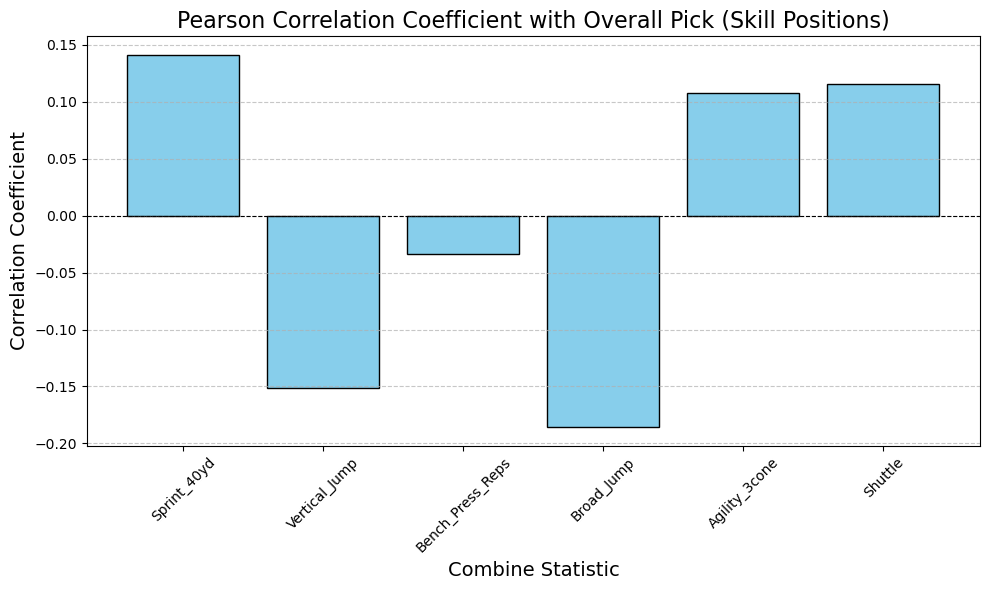

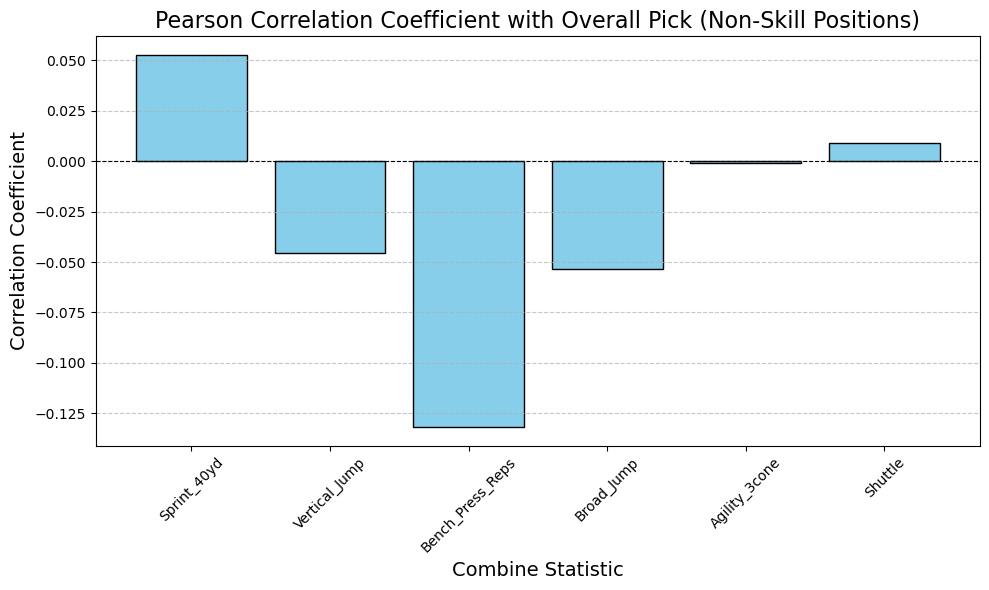

In [8]:
# Import required packages for finding correlations, P-values, and plotting our figures
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Define the combine metrics to analyze
combine_statistics = ['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle']

# Function to calculate correlations for a specific dataset
def calculate_correlations(dataset, group_name):
    results = []
    print(f"\nCalculating correlations for {group_name}:\n")
    
    for stat in combine_statistics:
        # Remove rows with NaN values for the specific stat and 'Overall Pick'
        cleaned_data = dataset[['Overall Pick', stat]].dropna()
        
        if len(cleaned_data) > 1:  # Ensure there's enough data for correlation
            # Calculate Pearson Correlation
            correlation, p_value = pearsonr(cleaned_data[stat], cleaned_data['Overall Pick'])
            
            # Append results to the list
            results.append({'Statistic': stat, 'Correlation': correlation, 'P-value': p_value})
            
            # Display the results
            print(f"Combine Statistic: {stat}")
            print(f"Pearson Correlation Coefficient: {correlation:.4f}")
            print(f"P-value: {p_value:.4e}")
        else:
            print(f"Combine Statistic: {stat} has insufficient data for {group_name}.")

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Calculate correlations for skill positions
skill_correlations = calculate_correlations(skill_positions_df, "Skill Positions")

# Calculate correlations for non-skill positions
non_skill_correlations = calculate_correlations(non_skill_positions_df, "Non-Skill Positions")

# Save the results to CSV files
skill_correlations.to_csv('skill_positions_correlation.csv', index=False)
non_skill_correlations.to_csv('non_skill_positions_correlation.csv', index=False)
print("\nResults saved to 'skill_positions_correlation.csv' and 'non_skill_positions_correlation.csv'")

# Visualize the results for skill and non-skill positions
def plot_correlations(results_df, group_name):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Statistic'], results_df['Correlation'], color='skyblue', edgecolor='black')
    plt.title(f'Pearson Correlation Coefficient with Overall Pick ({group_name})', fontsize=16)
    plt.xlabel('Combine Statistic', fontsize=14)
    plt.ylabel('Correlation Coefficient', fontsize=14)
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot correlations for skill positions
plot_correlations(skill_correlations, "Skill Positions")

# Plot correlations for non-skill positions
plot_correlations(non_skill_correlations, "Non-Skill Positions")

In [9]:
# top 3 metrics with the biggest impact for skill positions: broad jump, 40 time, vertical jump
# top 3 metrics with the biggest impact for non-skill positions: Bench press, 40 time, broad jump

#### Question 3: Which positions, if any, are prioritized early in the draft (overall pick 1-90)?

In [11]:
# Filter the merged data for early draft picks 
early_picks_df = merged_data[merged_data['Overall Pick'] <= 90]

# Calculate the count of positions in early picks
early_picks_position_counts = early_picks_df['Position'].value_counts()

# Calculate the count of positions in the overall draft
overall_position_counts = merged_data['Position'].value_counts()

# Calculate the percentage of each position in early picks and overall draft
early_picks_percentage = (early_picks_position_counts / early_picks_position_counts.sum()) * 100
overall_percentage = (overall_position_counts / overall_position_counts.sum()) * 100

# Create a DataFrame to compare the percentages
position_priority = pd.DataFrame({
    'Early Picks (%)': early_picks_percentage,
    'Overall Draft (%)': overall_percentage
}).fillna(0)

# Calculate the difference to highlight positions prioritized in early picks
position_priority['Difference (Early - Overall)'] = position_priority['Early Picks (%)'] - position_priority['Overall Draft (%)']

# Sort by the difference to identify positions prioritized in early picks
position_priority = position_priority.sort_values('Difference (Early - Overall)', ascending=False)

# Print the DataFrame
print("\nPositions prioritized in early draft picks (Overall Pick 1-90):")
display(position_priority)

# Optionally, save the results to a CSV file
#position_priority.to_csv('position_priority_early_picks.csv', index=True)
#print("\nResults saved to 'position_priority_early_picks.csv'")


Positions prioritized in early draft picks (Overall Pick 1-90):


,Early Picks (%),Overall Draft (%),Difference (Early - Overall)
Position,,,
DT,10.199557,8.061594,2.137962
DE,9.756098,7.971014,1.785083
OT,10.088692,8.559783,1.528909
CB,13.414634,12.454710,0.959924
WR,13.747228,13.179348,0.567881
QB,5.654102,5.253623,0.400479
OLB,7.982262,7.835145,0.147117
C,2.549889,2.445652,0.104237
DB,0.110865,0.045290,0.065575


In [12]:
# The higher the difference is the more prioritized the picks are

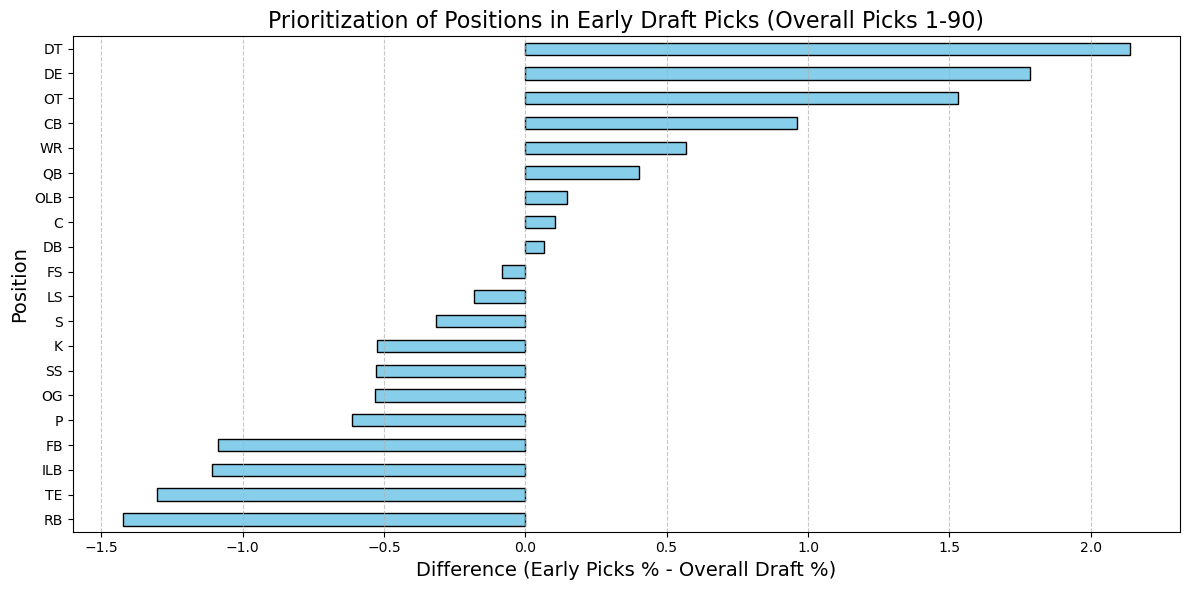

In [13]:
# Plotting the bar graph for the 'Difference (Early - Overall)'
plt.figure(figsize=(12, 6))
position_priority['Difference (Early - Overall)'].sort_values(ascending=True).plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

# Add title and labels
plt.title('Prioritization of Positions in Early Draft Picks (Overall Picks 1-90)', fontsize=16)
plt.xlabel('Difference (Early Picks % - Overall Draft %)', fontsize=14)
plt.ylabel('Position', fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()